### importing required packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import matplotlib as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


### Preparing the data

In [2]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv') # reading the data from csv file
train_data.head() #displaying the first 5 rows of the dataframe

Y = train_data.label.values
X = train_data.drop('label', axis =1).values

In [3]:
# Splitting the train dataset into train and validation data
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3)

In [4]:
#Normalizing the pixels
x_train = x_train / 225.0
x_val = x_val / 255.0

In [5]:
# Reshaping images to 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [6]:
# Creating train batches
train_data_gen = ImageDataGenerator(horizontal_flip=False, vertical_flip=False, rotation_range=15, shear_range=0.15, width_shift_range=0.15, height_shift_range=0.15)

train_batces = train_data_gen.flow(x_train, y_train, shuffle=True, batch_size=32)

In [7]:
# Creating validation batches
val_data_gen = ImageDataGenerator()

val_batches = val_data_gen.flow(x_val, y_val, shuffle=True, batch_size=32)

### Defining the model

In [8]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),  input_shape=(28,28,1), activation ='relu'),
    layers.Conv2D(32,(3,3),  activation ='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Dropout(0.2),
    
    layers.Conv2D(64,(3,3),  activation ='relu'),
    layers.Conv2D(64,(3,3),  activation ='relu'),
    layers.MaxPool2D(2,2),
    
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [9]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
EPOCHS = 5

# history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS, batch_size=32)
history = model.fit_generator(train_batces, validation_data=val_batches, epochs=EPOCHS)

Epoch 1/5
919/919 [==============================] - 13s 14ms/step - loss: 0.5729 - acc: 0.8114 - val_loss: 0.0884 - val_acc: 0.9724
Epoch 2/5
919/919 [==============================] - 11s 12ms/step - loss: 0.1839 - acc: 0.9448 - val_loss: 0.0697 - val_acc: 0.9806
Epoch 3/5
919/919 [==============================] - 11s 12ms/step - loss: 0.1247 - acc: 0.9634 - val_loss: 0.0449 - val_acc: 0.9871
Epoch 4/5
919/919 [==============================] - 11s 12ms/step - loss: 0.1091 - acc: 0.9677 - val_loss: 0.0431 - val_acc: 0.9864
Epoch 5/5
919/919 [==============================] - 11s 12ms/step - loss: 0.0912 - acc: 0.9729 - val_loss: 0.0368 - val_acc: 0.9890


### Viewing the results

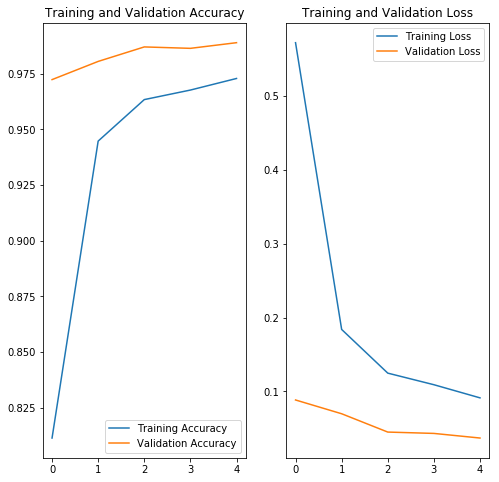

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc =  history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Verifying the results

In [12]:
test_data = pd.read_csv('../input/digit-recognizer/test.csv')
x_test = test_data.values.reshape(-1, 28,28,1) # loading and reshaping the images to (28,28,1)


In [13]:
predictions = model.predict(x_test)

pred = []
for p in predictions:
    pred.append(np.argmax(p))
    
len(pred)
image_id = test_data.index.values
image_id += 1
result = pd.DataFrame(columns=['ImageId', 'Label'])
result['ImageId'] =  image_id
result['Label'] = pred

result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [14]:
result.to_csv('submission.csv', index=False)